In [1]:
import os
import glob
from sklearn import preprocessing
import sklearn as skl
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_df = pd.read_pickle('processed_data_df.pkl')

In [3]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data_df, test_size = .20, random_state=0)

In [4]:
print("Train Size = {} | Test Size = {} | Test is {}% of Train".format(len(train_df),len(test_df), len(test_df)/len(data_df)))

Train Size = 12909793 | Test Size = 3227449 | Test is 0.20000003718107467% of Train


In [5]:
train_df.describe()

ACK Flag Cnt    Active Max   Active Mean    Active Min    Active Std  \
count  1.290979e+07  1.290979e+07  1.290979e+07  1.290979e+07  1.290979e+07   
mean   3.281827e-01  2.632066e+05  1.733903e+05  1.158532e+05  8.665526e+04   
std    4.695517e-01  3.322882e+06  2.509243e+06  2.117611e+06  1.515196e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.000000e+00  1.140000e+08  1.140000e+08  1.140000e+08  7.523241e+07   

       Bwd Blk Rate Avg  Bwd Byts/b Avg  Bwd Header Len   Bwd IAT Max  \
count        12909793.0      12909793.0    1.290979e+07  1.290979e+07   
mean                0.0             0.0    1.333694e+02  2.629842e+06   
std                 0.0             0.0    3.161170e+03  1.027558e+07   
min                 0.0             0.0    0.000000e+00  0.000000e+00   
25%                 0.0             0.0    0.000000e+00  0.000000e+00   
50%                 0.0             0.0    1.600000e+01  0.000000e+00   
75%                 0.0             0.0    1.040000e+02  2.266230e+05   
max                 0.0             0.0    2.421832e+06  1.200000e+08   

       Bwd IAT Mean  ...  SYN Flag Cnt  Subflow Bwd Byts  Subflow Bwd Pkts  \
count  1.290979e+07  ...  1.290979e+07      1.290979e+07      1.290979e+07   
mean   8.297453e+05  ...  4.191384e-02      4.724166e+03      6.325293e+00   
std    4.356267e+06  ...  2.003923e-01      2.275216e+05      1.589915e+02   
min    0.000000e+00  ...  0.000000e+00      0.000000e+00      0.000000e+00   
25%    0.000000e+00  ...  0.000000e+00      0.000000e+00      0.000000e+00   
50%    0.000000e+00  ...  0.000000e+00      1.020000e+02      1.000000e+00   
75%    1.722560e+05  ...  0.000000e+00      5.820000e+02      4.000000e+00   
max    1.200000e+08  ...  1.000000e+00      1.561992e+08      1.210910e+05   

       Subflow Fwd Byts  Subflow Fwd Pkts  Tot Bwd Pkts  Tot Fwd Pkts  \
count      1.290979e+07      1.290979e+07  1.290979e+07  1.290979e+07   
mean       9.910783e+02      2.394488e+01  6.325293e+00  2.394488e+01   
std        6.539920e+04      1.537295e+03  1.589915e+02  1.537295e+03   
min        0.000000e+00      0.000000e+00  0.000000e+00  0.000000e+00   
25%        0.000000e+00      1.000000e+00  0.000000e+00  1.000000e+00   
50%        4.300000e+01      2.000000e+00  1.000000e+00  2.000000e+00   
75%        4.900000e+02      5.000000e+00  4.000000e+00  5.000000e+00   
max        1.443918e+08      3.096290e+05  1.210910e+05  3.096290e+05   

       TotLen Bwd Pkts  TotLen Fwd Pkts  URG Flag Cnt  
count     1.290979e+07     1.290979e+07  1.290979e+07  
mean      4.724160e+03     9.910783e+02  4.199564e-02  
std       2.275198e+05     6.539920e+04  2.005792e-01  
min       0.000000e+00     0.000000e+00  0.000000e+00  
25%       0.000000e+00     0.000000e+00  0.000000e+00  
50%       1.020000e+02     4.300000e+01  0.000000e+00  
75%       5.820000e+02     4.900000e+02  0.000000e+00  
max       1.561992e+08     1.443918e+08  1.000000e+00  

[8 rows x 78 columns]

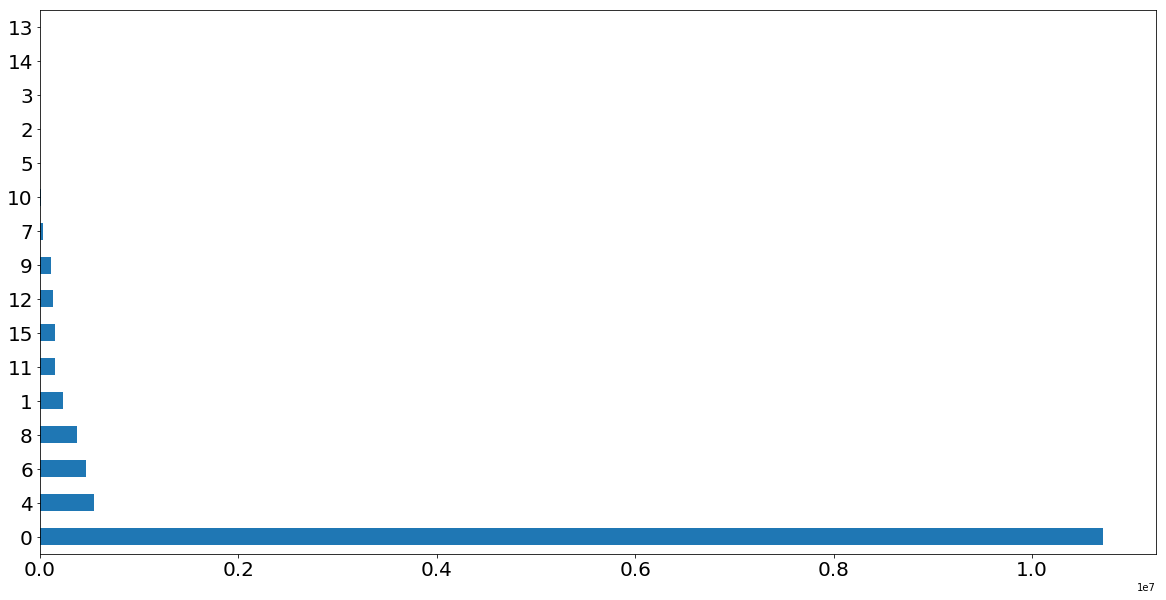

In [6]:
train_attack_types = train_df['Label'].value_counts()
test_attack_types = test_df['Label'].value_counts()
train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

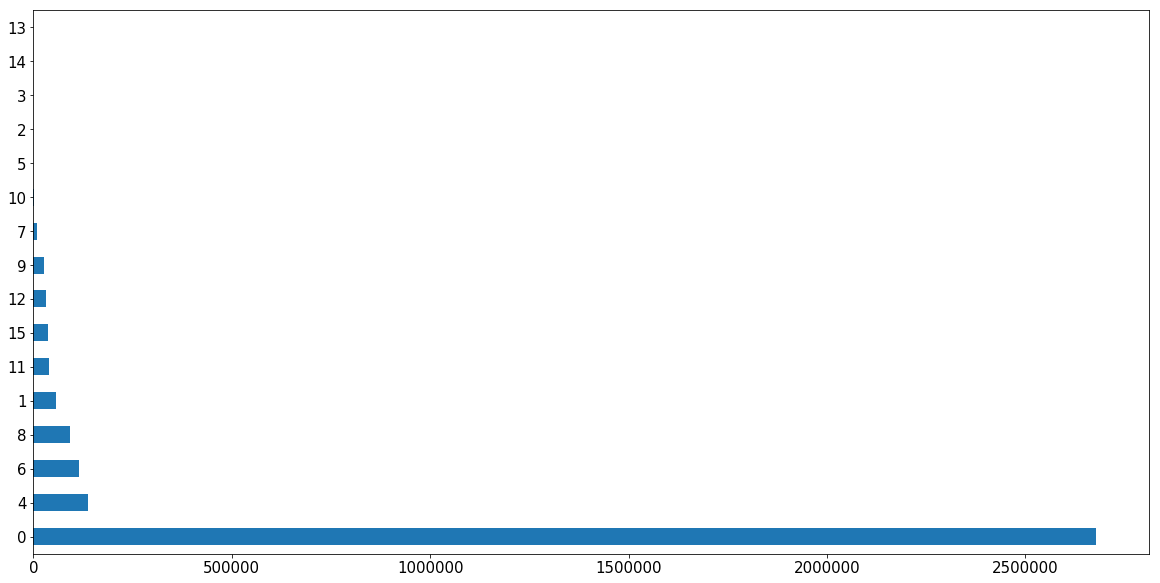

In [7]:
test_attack_types.plot(kind='barh', figsize=(20,10), fontsize=15)

In [8]:
train_Y = train_df['Label']
train_x_raw = train_df.drop(['Label'], axis=1)
test_Y = test_df['Label']
test_x_raw = test_df.drop(['Label'], 
                          axis=1)

In [9]:
combined_df_raw = pd.concat([train_x_raw, test_x_raw])

train_x = combined_df_raw[:len(train_x_raw)]
test_x = combined_df_raw[len(train_x_raw):]


train_x.describe()

ACK Flag Cnt    Active Max   Active Mean    Active Min    Active Std  \
count  1.290979e+07  1.290979e+07  1.290979e+07  1.290979e+07  1.290979e+07   
mean   3.281827e-01  2.632066e+05  1.733903e+05  1.158532e+05  8.665526e+04   
std    4.695517e-01  3.322882e+06  2.509243e+06  2.117611e+06  1.515196e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.000000e+00  1.140000e+08  1.140000e+08  1.140000e+08  7.523241e+07   

       Bwd Blk Rate Avg  Bwd Byts/b Avg  Bwd Header Len   Bwd IAT Max  \
count        12909793.0      12909793.0    1.290979e+07  1.290979e+07   
mean                0.0             0.0    1.333694e+02  2.629842e+06   
std                 0.0             0.0    3.161170e+03  1.027558e+07   
min                 0.0             0.0    0.000000e+00  0.000000e+00   
25%                 0.0             0.0    0.000000e+00  0.000000e+00   
50%                 0.0             0.0    1.600000e+01  0.000000e+00   
75%                 0.0             0.0    1.040000e+02  2.266230e+05   
max                 0.0             0.0    2.421832e+06  1.200000e+08   

       Bwd IAT Mean  ...  SYN Flag Cnt  Subflow Bwd Byts  Subflow Bwd Pkts  \
count  1.290979e+07  ...  1.290979e+07      1.290979e+07      1.290979e+07   
mean   8.297453e+05  ...  4.191384e-02      4.724166e+03      6.325293e+00   
std    4.356267e+06  ...  2.003923e-01      2.275216e+05      1.589915e+02   
min    0.000000e+00  ...  0.000000e+00      0.000000e+00      0.000000e+00   
25%    0.000000e+00  ...  0.000000e+00      0.000000e+00      0.000000e+00   
50%    0.000000e+00  ...  0.000000e+00      1.020000e+02      1.000000e+00   
75%    1.722560e+05  ...  0.000000e+00      5.820000e+02      4.000000e+00   
max    1.200000e+08  ...  1.000000e+00      1.561992e+08      1.210910e+05   

       Subflow Fwd Byts  Subflow Fwd Pkts  Tot Bwd Pkts  Tot Fwd Pkts  \
count      1.290979e+07      1.290979e+07  1.290979e+07  1.290979e+07   
mean       9.910783e+02      2.394488e+01  6.325293e+00  2.394488e+01   
std        6.539920e+04      1.537295e+03  1.589915e+02  1.537295e+03   
min        0.000000e+00      0.000000e+00  0.000000e+00  0.000000e+00   
25%        0.000000e+00      1.000000e+00  0.000000e+00  1.000000e+00   
50%        4.300000e+01      2.000000e+00  1.000000e+00  2.000000e+00   
75%        4.900000e+02      5.000000e+00  4.000000e+00  5.000000e+00   
max        1.443918e+08      3.096290e+05  1.210910e+05  3.096290e+05   

       TotLen Bwd Pkts  TotLen Fwd Pkts  URG Flag Cnt  
count     1.290979e+07     1.290979e+07  1.290979e+07  
mean      4.724160e+03     9.910783e+02  4.199564e-02  
std       2.275198e+05     6.539920e+04  2.005792e-01  
min       0.000000e+00     0.000000e+00  0.000000e+00  
25%       0.000000e+00     0.000000e+00  0.000000e+00  
50%       1.020000e+02     4.300000e+01  0.000000e+00  
75%       5.820000e+02     4.900000e+02  0.000000e+00  
max       1.561992e+08     1.443918e+08  1.000000e+00  

[8 rows x 77 columns]

In [10]:
# Example statistics for the 'duration' feature before scaling
train_x['Flow Duration'].describe()

count    1.290979e+07
mean     1.183372e+07
std      5.337467e+08
min     -9.190110e+11
25%      5.130000e+02
50%      2.271000e+04
75%      3.050740e+06
max      1.200000e+08
Name: Flow Duration, dtype: float64

In [11]:
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['Flow Duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

count    1.290979e+07
mean     1.165865e-18
std      1.000000e+00
min     -1.721833e+03
25%     -2.217008e-02
50%     -2.212849e-02
75%     -1.645533e-02
max      2.026547e-01
dtype: float64

In [12]:
# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

count    1.290979e+07
mean     9.998823e-01
std      5.807080e-04
min      0.000000e+00
25%      9.998694e-01
50%      9.998695e-01
75%      9.998728e-01
max      1.000000e+00
dtype: float64

In [13]:
# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

count    1.290979e+07
mean     3.872174e+00
std      1.749859e+02
min     -3.012927e+05
25%     -7.277163e-03
50%      0.000000e+00
75%      9.927228e-01
max      3.933389e+01
dtype: float64

In [14]:
# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler()

print(type(train_x))

train_x_scaled = pd.DataFrame(standard_scaler.fit_transform(train_x), columns=train_x.columns)

test_x_scaled = pd.DataFrame(standard_scaler.fit_transform(test_x), columns=test_x.columns)

<class 'pandas.core.frame.DataFrame'>


In [15]:
train_Y_bin = train_Y
test_Y_bin = test_Y
type(test_x_scaled)

pandas.core.frame.DataFrame

In [16]:
print(len(train_Y), len(train_x))

12909793 12909793


In [18]:
train_x_scaled.to_pickle('train_x.pkl')
train_Y.to_pickle('train_Y.pkl')
test_x_scaled.to_pickle('test_x.pkl')
test_Y.to_pickle('test_Y.pkl')